
![D.lensalot logo](./../../res/dlensalot2.PNG)

# Interactive minimal working example - OBD matrix
In this tutorial you generate an overlapping B-mode deprojection matrix, and apply it to a noisemodel using a masked sky.
At the end of this tutorial, you will plot the power spectrum of a single simulation, and deproject its B-modes using the OBD matrix.

This tutorial uses two configuration files. The [first](https://github.com/NextGenCMB/D.lensalot/blob/sv3.1/lenscarf/ana/config/examples/mwe/conf_mwe_buildOBD.py) is for generating the OBD matrix, and you can freely change the parameters to your liking. 

The 
 * `DLENSALOT_Analysis` is mainly needed for pointing D.lensalot to the mask you will generate in this notebook,
 * `DLENSALOT_Noisemodel` configures the noise model. You should choose the setting applicable to the simulations and/or data you'd like to deproject,
 * `DLENSALOT_OBD` defines where the Matrix temp and final files are stored and other simulation and/or data specific settings


In [1]:
import os
from os.path import join as opj

import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

import lenscarf
from lenscarf.run import run
from lenscarf.lerepi.visalot import plot_helper as ph

cond4mpi does not exists
could not setup healpix hack. reverting to standard healpy
MSC: using scarf with 2 OMP threads


# Create mask
Due to masking the noise model is no longer isotropic.

fsky: 0.667
mask stored at /pscratch/sd/s/sebibel/OBDmatrix_nside512_lmax100/mask.fits


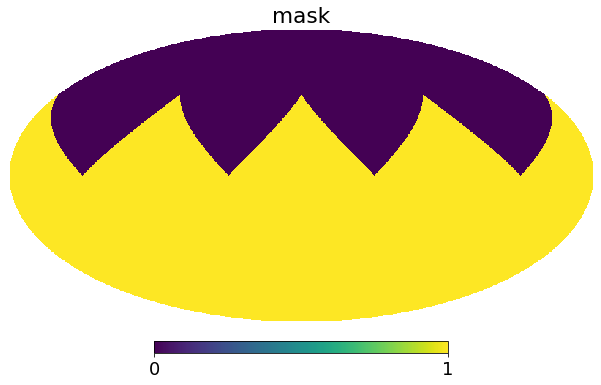

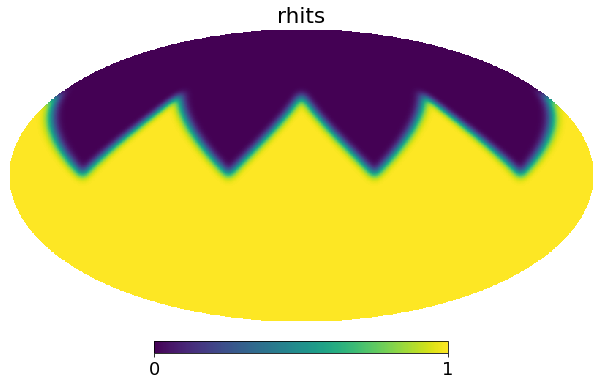

In [8]:
m = np.zeros(hp.nside2npix(1))
m[[4,5,6,7,8,9,10,11]] = 1
rhits = np.abs(hp.smoothing(hp.ud_grade(m, nside_out=512),0.1))
mask = hp.ud_grade(m, nside_out=512)
hp.mollview(mask, nest=False, title='mask')
hp.mollview(rhits, nest=False, title='rhits')
print('fsky: {:.3f}'.format(np.mean(m)))

mask_fn = opj(os.environ['SCRATCH'], 'OBDmatrix_nside512_lmax100/mask.fits') #opj(ana_mwe.TEMP,'mask.fits')
rhits_fn = opj(os.environ['SCRATCH'], 'OBDmatrix_nside512_lmax100/rhits.fits') #opj(ana_mwe.TEMP,'mask.fits')

if not os.path.isdir(os.path.dirname(mask_fn)):
    os.makedirs(os.path.dirname(mask_fn))
    
if not os.path.isfile(mask_fn):
    hp.write_map(mask_fn, mask)
    hp.write_map(rhits_fn, rhits)
    print('mask stored at {}'.format(mask_fn))

# Create the OBD matrix
This may take a while (~30minutes), go grab a coffee

In [7]:
fn = '/global/homes/s/sebibel/git/notebooks/dlensalot/dev/conf_mwe_buildOBD.py'
ana_mwe = run(config=fn, job_id='build_OBD', verbose=True).job
ana_mwe.run()

INFO:: 02-06 08:51:: lenscarf.lerepi.core.handler.log - load_configfile() Started: /global/homes/s/sebibel/git/notebooks/dlensalot/dev/conf_mwe_buildOBD.py
INFO:: 02-06 08:51:: lenscarf.lerepi.core.handler.log - load_configfile() Finished
INFO:: 02-06 08:51:: lenscarf.lerepi.core.handler.log - store() Started
INFO:: 02-06 08:51:: lenscarf.lerepi.core.handler.log - load_configfile() Started: /pscratch/sd/s/sebibel/OBDmatrix_nside512_lmax100/conf_mwe_buildOBD.py
INFO:: 02-06 08:51:: lenscarf.lerepi.core.handler.log - load_configfile() Finished
INFO:: 02-06 08:51:: root.store - config file look the same. Resuming where I left off last time.
INFO:: 02-06 08:51:: root.store - Matching config file found. Resuming where I left off.
INFO:: 02-06 08:51:: lenscarf.lerepi.core.handler.log - store() Finished
INFO:: 02-06 08:51:: lenscarf.lerepi.core.handler.log - collect_jobs() Started
INFO:: 02-06 08:51:: lenscarf.lerepi.core.handler.log - collect_jobs() Finished
INFO:: 02-06 08:51:: lenscarf.ler

In [8]:
ana_mwe.__dict__

{'TEMP': '/pscratch/sd/s/sebibel/OBDmatrix_nside512_lmax100',
 'tr': 2,
 'TEMP_suffix': ('',),
 'mask_fn': '/pscratch/sd/s/sebibel/OBDmatrix_nside512_lmax100/mask.fits',
 'nside': 512,
 'libdir': '/pscratch/sd/s/sebibel/OBDmatrix_nside512_lmax100',
 'nlev_dep': 10000.0,
 'beam': 1,
 'lmax': 1024,
 'lmin_b': 100,
 'geom': <scarf.Geometry at 0x1542b24f4cf0>,
 'masks': [array([2.42570700e-08, 2.42570700e-08, 2.42570700e-08, ...,
         9.99993461e-01, 9.99993461e-01, 9.99993461e-01]),
  '/pscratch/sd/s/sebibel/OBDmatrix_nside512_lmax100/mask.fits'],
 'rhits_map': array([2.42570700e-08, 2.42570700e-08, 2.42570700e-08, ...,
        9.99993461e-01, 9.99993461e-01, 9.99993461e-01]),
 'nlev_p': 1.4142135623730951,
 'ninv_p_desc': [[array([23.60513377]),
   array([2.42570700e-08, 2.42570700e-08, 2.42570700e-08, ...,
          9.99993461e-01, 9.99993461e-01, 9.99993461e-01]),
   '/pscratch/sd/s/sebibel/OBDmatrix_nside512_lmax100/mask.fits']],
 'ninv_p': array([[ 0.        ,  0.        ,  0.   

# Apply to simulation data
The second [configuration file](https://github.com/NextGenCMB/D.lensalot/blob/sv3.1/lenscarf/ana/config/examples/mwe/conf_mwe_applyOBD.py)
generates a single simulated CMB inclusive of some noise, applies the above generated mask, and applies the OBD matrix on the noise-model to correctly deproject the B-modes

In [2]:
fn = '/global/homes/s/sebibel/git/notebooks/dlensalot/dev/conf_mwe_applyOBD.py'
ana_mwe = run(config=fn, job_id='QE_lensrec', verbose=True).job

INFO:: 02-06 07:08:: lenscarf.lerepi.core.handler.log - load_configfile() Started: /global/homes/s/sebibel/git/notebooks/dlensalot/dev/conf_mwe_applyOBD.py
INFO:: 02-06 07:08:: lenscarf.lerepi.core.handler.log - load_configfile() Finished
INFO:: 02-06 07:08:: lenscarf.lerepi.core.handler.log - store() Started
INFO:: 02-06 07:08:: lenscarf.lerepi.core.handler.log - load_configfile() Started: /pscratch/sd/s/sebibel/dlensalot/lenscarf/generic/sims_cmb_len_OBD_my_first_dlensalot_analysis_applyOBD/conf_mwe_applyOBD.py
INFO:: 02-06 07:08:: lenscarf.lerepi.core.handler.log - load_configfile() Finished
INFO:: 02-06 07:08:: root.store - config file look the same. Resuming where I left off last time.
INFO:: 02-06 07:08:: root.store - Matching config file found. Resuming where I left off.
INFO:: 02-06 07:08:: lenscarf.lerepi.core.handler.log - store() Finished
INFO:: 02-06 07:08:: lenscarf.lerepi.core.handler.log - collect_jobs() Started
INFO:: 02-06 07:08:: lenscarf.lerepi.core.handler.log - col

# Check result
You can test if it worked by plotting the B spectra after Wiener-filtering

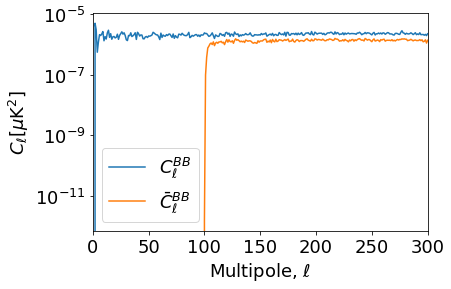

In [5]:
b = ana_mwe._sims.get_sim_blm(0)
ivf_b = ana_mwe.ivfs.get_sim_bmliklm(simidx)
plt.plot(hp.alm2cl(b), label='$C_\ell^{BB}$')
plt.plot(hp.alm2cl(ivf_b), label=r'$\bar{C}_\ell^{BB}$')
plt.yscale('log')
plt.xlim(0,300)

plt.xlabel('Multipole, $\ell$')
plt.ylabel('$C_\ell [\mu $'+r'$\rm{K}^2$]')
plt.legend()
plt.show()